# An introduction to deep learning

## 1. Gradient Descent Algorithms

Gradient Descent is an optimization algorithm that helps machine learning models converge at a minimum value through repeated steps. Essentially, gradient descent is used to minimize a function by finding the value that gives the lowest output of that function. Often times, this function is usually a loss function. Loss functions measure how bad our model performs compared to actual occurrences. Hence, it only makes sense that we should reduce this loss. One way to do this is via Gradient Descent.

A simple gradient Descent Algorithm is as follows:
1. Obtain a function to minimize F(x)
1. Obtain the derivative of that value x (the descent)
1. Initialize a value x from which to start the descent or optimization from
1. Specify a learning rate that will determine how much of a step to descend by or how quickly you converge to the minimum value
1. Proceed to descend by the derivative of that value multiplied by the learning rate
1. Update the value of x with the new value descended to
1. Check your stop condition to see whether to stop
1. If condition satisfied, stop. If not, proceed to step 4 with the new x value and keep repeating algorithm

## 2. Python implementation

### 2.1. Creating the function and define it's derivative.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# DEFINE function
function = lambda x: (x ** 3)-(3 *(x ** 2))+7

In [2]:
# DEFINE a derivative
def deriv(f, x, epsilon=0.0001):
    return (f(x+epsilon) - f(x)) / epsilon

<Figure size 432x288 with 0 Axes>

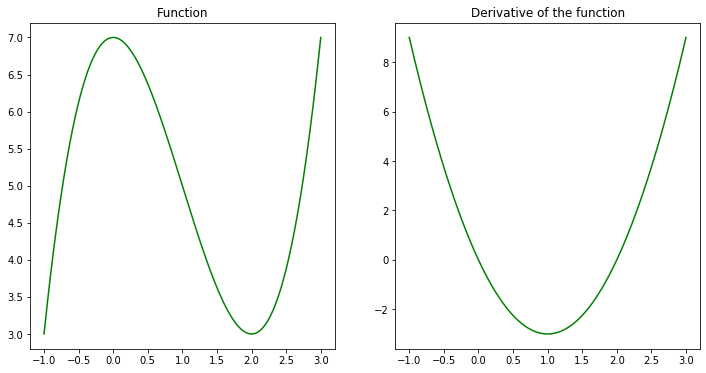

In [3]:
# PLOT both function and derivative

x = np.linspace(-1,3,500)

plt.figure()
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(x, function(x), c="g")
plt.title("Function")

plt.subplot(122)
plt.plot(x, deriv(function, x), c="g")
plt.title("Derivative of the function")

plt.show()


### 2.3. Apply gradient descent method

#### Build step function

This function takes a value of x and returns x' such that f(x') < f(x) if the learning rate (lr) is well chosen

$$x' = x - \frac{df}{dx}(x) * lr$$

In [4]:
def step(function, x, l_r=0.05):
    # get the derivation of the value of x
    d_x = deriv(function, x)
    
    # new value of X
    new_x = x - (d_x * l_r)
    
    return new_x

#### use step function in order to find a x that minimize f(x)

In [5]:
def GD(function, x, learning_rate, precision=0.001):
    x_list = [x]
    while len(x_list)==1 or abs(x_list[-1]-x_list[-2])>precision:
        x_pred = x
        x = step(function, x, l_r=learning_rate)
        x_list += [x]
        
    return x_list

x_list = GD(function, 0.5, 0.05)

#### plot the result

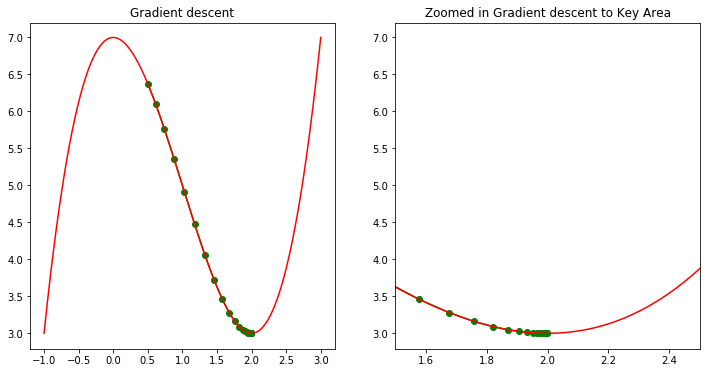

In [6]:
def plot(function, x_list):
    plt.figure(figsize=(12,6))

    plt.subplot(121)
    plt.scatter(x_list, [function(x) for x in x_list], c="g")
    plt.plot(x_list, [function(x) for x in x_list], c="g")
    plt.plot(np.linspace(-1,3,500), function(np.linspace(-1,3,500)), c="r")
    plt.title("Gradient descent")

    plt.subplot(122)
    plt.scatter(x_list, [function(x) for x in x_list],c="g")
    plt.plot(x_list, [function(x) for x in x_list],c="g")
    plt.plot(np.linspace(-1,3,500), function(np.linspace(-1,3,500)), c="r")
    plt.xlim([1.5,2.5])
    plt.title("Zoomed in Gradient descent to Key Area")

    plt.show()
    
plot(function, x_list)

#### Reproduce the result with another learning rate

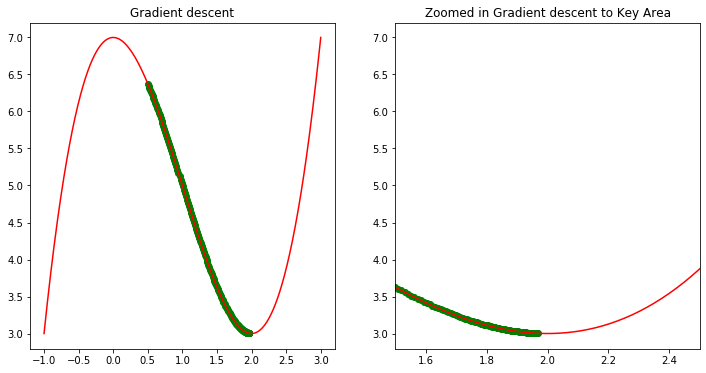

In [7]:
x_list = GD(function, 0.5, 0.005)
plot(function, x_list)

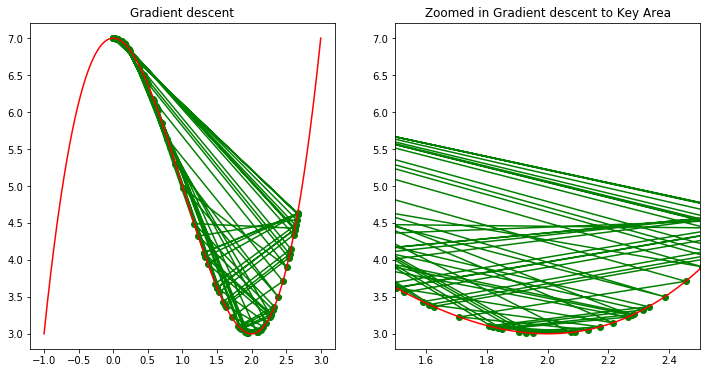

In [8]:
x_list = GD(function, 0.5, 0.5)
plot(function, x_list)